In [15]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [16]:
source_path = './PetImages'
source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [17]:
# grader-required-cell

# Define root directory
root_dir = './cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  os.mkdir(root_dir)
  a = os.path.join(root_dir, "training")
  b = os.path.join(root_dir, "validation")
  os.mkdir(a)
  os.mkdir(b)
  c = os.path.join(a, "cats")
  d = os.path.join(a, "dogs")
  e = os.path.join(b, "cats")
  f = os.path.join(b, "dogs")
  os.mkdir(c)
  os.mkdir(d)
  os.mkdir(e)
  os.mkdir(f)




  ### END CODE HERE

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [18]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./cats-v-dogs/training
./cats-v-dogs/validation
./cats-v-dogs/training/dogs
./cats-v-dogs/training/cats
./cats-v-dogs/validation/dogs
./cats-v-dogs/validation/cats


In [19]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  files = os.listdir(SOURCE_DIR)
  random.shuffle(files)
  midval = int(SPLIT_SIZE*len(files))
  files1 = files[:midval]
  files2 = files[midval+1:]
  for x in files1:
    
    if os.path.getsize(os.path.join(SOURCE_DIR, x))==0:
      print("filename is zero length, so ignoring.")
    else:
      copyfile(os.path.join(SOURCE_DIR, x), os.path.join(TRAINING_DIR, x))
  for y in files2:
    if os.path.getsize(os.path.join(SOURCE_DIR, y))==0:
      print("filename is zero length, so ignoring.")
    else:
      copyfile(os.path.join(SOURCE_DIR, y), os.path.join(VALIDATION_DIR, y))
  ### END CODE HERE

In [24]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "./PetImages/Cat/"
DOG_SOURCE_DIR = "./PetImages/Dog/"

TRAINING_DIR = "./cats-v-dogs/training/"
VALIDATION_DIR = "./cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

filename is zero length, so ignoring.
filename is zero length, so ignoring.


Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [25]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=30,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen =ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=30,
                                                                class_mode="binary",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [26]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22496 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [27]:
# grader-required-cell
from tensorflow.keras import optimizers, losses
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(75, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  
  model.compile(loss=losses.BinaryCrossentropy(),
                  optimizer="adam",
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [28]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
361/750 [=============>................] - ETA: 42s - loss: 0.6784 - accuracy: 0.5622

/Users/shusanketbasyal/anaconda3/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


750/750 [==============================] - 85s 113ms/step - loss: 0.6509 - accuracy: 0.6082 - val_loss: 0.5692 - val_accuracy: 0.7144
Epoch 2/15
750/750 [==============================] - 88s 117ms/step - loss: 0.5844 - accuracy: 0.6903 - val_loss: 0.5643 - val_accuracy: 0.7080
Epoch 3/15
750/750 [==============================] - 89s 119ms/step - loss: 0.5479 - accuracy: 0.7228 - val_loss: 0.4734 - val_accuracy: 0.7748
Epoch 4/15
750/750 [==============================] - 88s 118ms/step - loss: 0.5218 - accuracy: 0.7389 - val_loss: 0.4484 - val_accuracy: 0.7848
Epoch 5/15
750/750 [==============================] - 89s 119ms/step - loss: 0.5007 - accuracy: 0.7544 - val_loss: 0.4554 - val_accuracy: 0.7848
Epoch 6/15
750/750 [==============================] - 89s 118ms/step - loss: 0.4768 - accuracy: 0.7717 - val_loss: 0.4317 - val_accuracy: 0.8060
Epoch 7/15
750/750 [==============================] - 90s 120ms/step - loss: 0.4570 - accuracy: 0.7873 - val_loss: 0.4626 - val_accuracy: 0.7

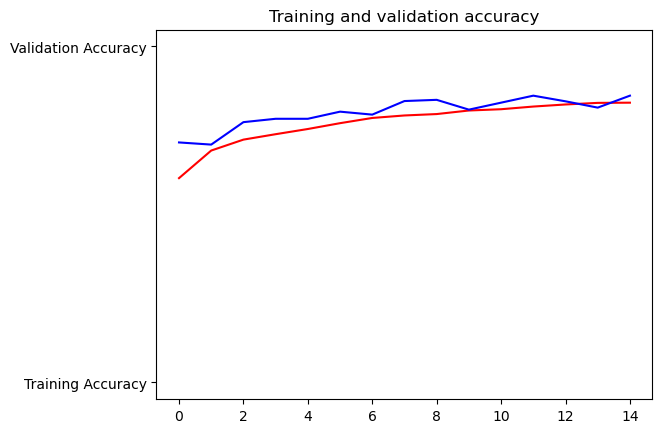

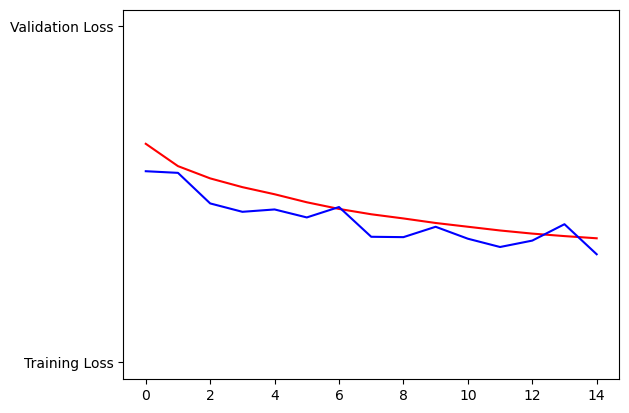

In [29]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()